<a href="https://colab.research.google.com/github/doantrang2312/London-Airbnb-Market/blob/main/MilestoneProject_TrangTruong_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# London AIRBNB Market

This is a data analysis project of the London Airbnb market, targeting prospective hosts who are interested in starting their own hosting business on the platform. 

The main objective of the project is to provide insights into the market, such as the density of Airbnb listings by neighbourhood, the host profile (investor or individual), and the types of rooms available for rent etc. 

Using this information, I analyzed the supply and demand curve to identify neighbourhoods with relatively high demand, which could be suitable locations for prospective hosts to start their business. 

Additionally, I provided recommendations on the right pricing policy and how to take care of the listing on the website to maximize its potential. 

By doing so, the prospective hosts can make informed decisions about their investment in the London Airbnb market and increase their chances of success. The project also highlights the potential of data analysis in gaining insights into the market and making informed decisions about business investments.

# Import Data & Libraries

Let's connect to google drive, read csv files in the Airbnb dataset and import libraries that are useful for the analysis

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install geopandas library to work with geospatial data
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 90.7 MB/s eta 0:00:00


In [ ]:
# Install wordcloud library to work with reviews from Airbnb guests
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import pandas, matplotlib etc. for data analysis and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager

import numpy as np
import scipy.stats as stats

import geopandas as gpd
from geopandas import GeoDataFrame

import seaborn as sns

# DEPRECATED
# import geoplot as gplt

import warnings
warnings.filterwarnings('ignore') 

import textwrap
from shapely.geometry import Point

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

import re


import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Read files
listings = pd.read_csv('/content/drive/MyDrive/Data Science/MilestoneProject/listings.csv')
geo = gpd.read_file('/content/drive/MyDrive/Data Science/MilestoneProject/neighbourhoods.geojson')
# neighbourhoods = pd.read_csv('/content/drive/MyDrive/Data Science/MilestoneProject/neighbourhoods.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Data Science/MilestoneProject/reviews.csv')
# calendar = pd.read_csv('/content/drive/MyDrive/Data Science/MilestoneProject/calendar.csv.gz')

# Data cleaning



First, le'ts take a look at the Airbnb listings dataframe

In [ ]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20221210143044,2022-12-11,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.84,4.71,4.71,NaN,f,2,1,1,0,0.27
1,15400,https://www.airbnb.com/rooms/15400,20221210143044,2022-12-12,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.58


Checking number of listings and features

In [ ]:
listings.shape

(71938, 75)

Checking the columns data types, missing data and in particular whether some numeric variables need to be converted from object to numeric (int64, float64)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71938 entries, 0 to 71937
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            71938 non-null  int64  
 1   listing_url                                   71938 non-null  object 
 2   scrape_id                                     71938 non-null  int64  
 3   last_scraped                                  71938 non-null  object 
 4   source                                        71938 non-null  object 
 5   name                                          71914 non-null  object 
 6   description                                   70487 non-null  object 
 7   neighborhood_overview                         40605 non-null  object 
 8   picture_url                                   71938 non-null  object 
 9   host_id                                       71938 non-null 

Extracting columns with dtype = "object".

Some of them are actually numeric and need conversion, such as:

* host_response_rate
* price
* host_acceptance_rate

The below are boolean and can be coverted from f, t to 0, 1: 
* host_is_superhost
* host_has_profile_pic
* host_identity_verified
* has_availability
* instant_bookable


In [ ]:
# Use the map() method to convert 't', 'f' values to True, False boolean values
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': True, 'f': False})
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'t': True, 'f': False})
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': True, 'f': False})
listings['has_availability'] = listings['has_availability'].map({'t': True, 'f': False})
listings['instant_bookable'] = listings['instant_bookable'].map({'t': True, 'f': False})

In [ ]:
obj_listings_types = listings.dtypes == 'object'
obj_cols = obj_listings_types[obj_listings_types].index.to_list()
obj_cols

['listing_url',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'price',
 'calendar_last_scraped',
 'first_review',
 'last_review']

Check the format, data type and missing data of column Price

In [ ]:
listings.price.value_counts()

$100.00      2045
$50.00       1754
$150.00      1616
$40.00       1570
$80.00       1555
             ... 
$1,541.00       1
$1,075.00       1
$1,307.00       1
$1,557.00       1
$1,484.00       1
Name: price, Length: 1526, dtype: int64

In [ ]:
#checking if there is any NAs on the price column
listings.price.isna().sum()

0

Price needs some parsing, remove dollar sign and convert to float

In [ ]:
listings.price = listings.price.str.strip('$').str.replace(",", "").astype(float)

Checking rows with 0 price

In [ ]:
print("There are {} listings with zero price".format(len(listings[listings.price == 0])))

There are 13 listings with zero price


We have only 13 listings with zero price over 72k listings. Those 13 rows that can be removed from the dataset without impacting our analysis.

In [ ]:
listings = listings[listings.price !=0]

The columns host_response_rate, host_acceptance_rate are numeric and need some parsing. 

Furthermore they have a lot of rows with NAs.It needs more investigations as to whether those rows could be imputed, as they can't be simply removed.

In [ ]:
listings['host_response_rate'].value_counts()

100%    30381
99%      2084
90%      1903
80%      1089
98%      1078
        ...  
59%         2
18%         1
42%         1
35%         1
52%         1
Name: host_response_rate, Length: 78, dtype: int64

In [ ]:
listings['host_acceptance_rate'].isna().sum()

24026

In [ ]:
listings['host_response_rate'].isna().sum()

26997

In [ ]:
host_acc_rate_filtered = listings[~(listings['host_acceptance_rate'].isna())]['host_acceptance_rate'].str.strip('%').astype(float)*0.01

In [ ]:
host_response_rate_filtered = listings[~(listings['host_response_rate'].isna())]['host_response_rate'].str.strip('%').astype(float)*0.01

Let's check the distribution of those columns to see if we can fill the Nan values

We can't really fill NaN with specific values as there are still many values between 0.0 and 0.9

Let's just apply some parsing and Change the type of columns 'host_reponse_rate' and 'host_acceptance_rate'

In [ ]:
listings.loc[~(listings['host_response_rate'].isna()), "host_response_rate"] = listings['host_response_rate'].str.strip('%').astype(float)*0.01

In [ ]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'], errors='coerce')

In [ ]:
listings.loc[~(listings['host_acceptance_rate'].isna()), "host_acceptance_rate"] = listings['host_acceptance_rate'].str.strip('%').astype(float)*0.01

In [ ]:
listings['host_acceptance_rate'] = pd.to_numeric(listings['host_acceptance_rate'], errors='coerce')

New column number_of_amenities can be calculated based on column amenities

In [ ]:
listings.amenities.head(5)

0    ["Board games", "Conditioner", "Freezer", "Sho...
1    ["Smoke alarm", "Long term stays allowed", "Wa...
2    ["TV with standard cable", "Long term stays al...
3    ["Cleaning products", "Ceiling fan", "Stainles...
4    ["Fire extinguisher", "Hot water", "Shampoo", ...
Name: amenities, dtype: object

In [ ]:
listings['number_of_amenities'] = listings.amenities.apply(len)
listings.number_of_amenities.dtype

dtype('int64')

Add column description_len which is the length of the description of the listing

In [ ]:
listings['description'] = listings.description.astype(str)
listings['description_len'] = listings.description.apply(lambda x:len(x.split()))

Add column host_about_len which is the length of the description of the host

In [ ]:
listings['host_about'] = listings.host_about.astype(str)
listings['host_about_len'] = listings.host_about.apply(lambda x:len(x.split()))

Add column 'inner_outer' to indicate whether the listing is located in Inner or Outer London

In [ ]:
inner = ['Camden','Greenwich','Hackney','Hammersmith and Fulham','Islington','Kensington and Chelsea','Lambeth','Lewisham','Southwark','Tower Hamlets','Wandsworth','Westminster','Newham', 'Harringey','City of London']

In [ ]:
listings['inner_outer'] = listings.neighbourhood_cleansed.apply(lambda x: 'Inner London' if x in inner else 'Outer London')

Extracting Statistics for Numeric Features

There is a number of columns with NaNs or missing data, to be investigated further

In [ ]:
listings.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,number_of_amenities,description_len,host_about_len
count,7.192500e+04,7.192500e+04,7.192500e+04,44928.000000,47899.000000,71920.000000,71920.000000,0.0,71925.000000,71925.000000,...,53798.000000,0.0,71925.000000,71925.000000,71925.000000,71925.000000,54809.000000,71925.000000,71925.000000,71925.000000
mean,1.906765e+17,2.022121e+13,1.301944e+08,0.936528,0.834337,30.764182,57.906452,NaN,51.509797,-0.128056,...,4.615662,NaN,12.692388,9.537143,3.002725,0.023608,0.926553,408.124797,110.181189,32.436093
std,3.089289e+17,0.000000e+00,1.448685e+08,0.168811,0.248878,170.770694,351.066247,NaN,0.048225,0.098936,...,0.517317,NaN,39.946626,34.141998,16.006352,0.313967,1.298284,270.517459,54.262935,57.181418
min,1.391300e+04,2.022121e+13,2.594000e+03,0.000000,0.000000,1.000000,1.000000,NaN,51.295937,-0.497800,...,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,2.000000,1.000000,0.000000
25%,1.901180e+07,2.022121e+13,1.910837e+07,0.970000,0.750000,1.000000,1.000000,NaN,51.483460,-0.189600,...,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000,196.000000,67.000000,1.000000
50%,3.666067e+07,2.022121e+13,6.250367e+07,1.000000,0.960000,2.000000,2.000000,NaN,51.513780,-0.125750,...,4.750000,NaN,1.000000,1.000000,0.000000,0.000000,0.470000,337.000000,118.000000,5.000000
75%,5.940714e+17,2.022121e+13,2.072122e+08,1.000000,1.000000,5.000000,8.000000,NaN,51.539792,-0.068250,...,5.000000,NaN,4.000000,2.000000,1.000000,0.000000,1.150000,557.000000,161.000000,43.000000
max,7.781518e+17,2.022121e+13,4.908020e+08,1.000000,1.000000,1935.000000,24032.000000,NaN,51.681142,0.288570,...,5.000000,NaN,281.000000,278.000000,206.000000,11.000000,48.000000,2251.000000,217.000000,2002.000000


Filtering full dataset to use only numeric features

In [ ]:
numeric_columns = listings.describe().columns.to_list()
numeric_columns 

['id',
 'scrape_id',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_cou

In [ ]:
listings_numeric = listings[numeric_columns]
listings_numeric.head()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,number_of_amenities,description_len,host_about_len
0,13913,20221210143044,54730,0.80,0.71,3.0,4.0,NaN,51.568610,-0.112700,...,4.71,NaN,2,1,1,0,0.27,1023,181,41
1,15400,20221210143044,60302,0.78,0.33,1.0,12.0,NaN,51.487800,-0.168130,...,4.74,NaN,1,1,0,0,0.58,388,167,67
2,172811,20221210143044,806983,NaN,NaN,1.0,5.0,NaN,51.547100,-0.179810,...,NaN,NaN,1,1,0,0,NaN,83,48,10
3,173082,20221210143044,813141,1.00,0.96,2.0,5.0,NaN,51.538254,-0.044086,...,4.71,NaN,2,2,0,0,1.44,693,161,149
4,42010,20221210143044,157884,1.00,0.99,2.0,4.0,NaN,51.585900,-0.164340,...,4.87,NaN,2,0,2,0,3.55,312,177,108


Checking for Duplicated Values

In [ ]:
print(np.sum(listings_numeric.duplicated()), 'values are duplicated.')

0 values are duplicated.


Checking for missing data

In [ ]:
numeric_col_missing_values = np.sum(listings_numeric.isnull())[np.sum(listings_numeric.isnull())!=0]
numeric_col_missing_values

host_response_rate              26997
host_acceptance_rate            24026
host_listings_count                 5
host_total_listings_count           5
neighbourhood_group_cleansed    71925
bathrooms                       71925
bedrooms                         3460
beds                             1167
minimum_minimum_nights              1
maximum_minimum_nights              1
minimum_maximum_nights              1
maximum_maximum_nights              1
minimum_nights_avg_ntm              1
maximum_nights_avg_ntm              1
calendar_updated                71925
review_scores_rating            17115
review_scores_accuracy          18091
review_scores_cleanliness       18078
review_scores_checkin           18124
review_scores_communication     18094
review_scores_location          18124
review_scores_value             18127
license                         71925
reviews_per_month               17116
dtype: int64

Some columns have no data at all - they can be removed:

* neighbourhood_group_cleansed
* bathrooms
* calendar_updated
* license


In [ ]:
cols_no_data = numeric_col_missing_values[numeric_col_missing_values == len(listings_numeric)]
cols_no_data

neighbourhood_group_cleansed    71925
bathrooms                       71925
calendar_updated                71925
license                         71925
dtype: int64

In [ ]:
listings_numeric.drop(cols_no_data.index.to_list(), axis = 1, inplace= True)

Other columns have partial missing data

In [ ]:
numeric_col_missing_values = np.sum(listings_numeric.isnull())[np.sum(listings_numeric.isnull())!=0]
numeric_col_missing_values

host_response_rate             26997
host_acceptance_rate           24026
host_listings_count                5
host_total_listings_count          5
bedrooms                        3460
beds                            1167
minimum_minimum_nights             1
maximum_minimum_nights             1
minimum_maximum_nights             1
maximum_maximum_nights             1
minimum_nights_avg_ntm             1
maximum_nights_avg_ntm             1
review_scores_rating           17115
review_scores_accuracy         18091
review_scores_cleanliness      18078
review_scores_checkin          18124
review_scores_communication    18094
review_scores_location         18124
review_scores_value            18127
reviews_per_month              17116
dtype: int64

The following features have only a few rows with missing data in the same rows, which can be safely excluded as well:

* host_listings_counts
* host_total_listings_count
* minimum_minimum_nights          
* maximum_minimum_nights            
* minimum_maximum_nights             
* maximum_maximum_nights            
* minimum_nights_avg_ntm          
* maximum_nights_avg_ntm

Columns "host_total_listings_counts" and "host_listings_counts" have missing data for the same 5 rows

In [ ]:
listings_numeric[
                  (listings_numeric.host_listings_count.isna()) |
                  (listings_numeric.host_total_listings_count.isna())
                  ]

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,number_of_amenities,description_len,host_about_len
4286,5811550,20221210143044,8317501,NaN,NaN,NaN,NaN,51.52512,-0.06566,1,...,NaN,NaN,1,0,1,0,NaN,102,42,1
5526,7007873,20221210143044,22047056,NaN,NaN,NaN,NaN,51.49459,-0.13414,2,...,NaN,NaN,1,0,1,0,NaN,107,66,1
6176,7595146,20221210143044,39828462,NaN,NaN,NaN,NaN,51.48730,-0.01428,2,...,NaN,NaN,1,0,1,0,NaN,171,51,1
6728,8149344,20221210143044,43023101,NaN,NaN,NaN,NaN,51.63272,0.00607,2,...,NaN,NaN,1,0,1,0,NaN,200,164,1
7125,8511150,20221210143044,44815642,NaN,NaN,NaN,NaN,51.53744,-0.13965,1,...,NaN,NaN,1,0,1,0,NaN,133,12,1


Columns "'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights' and 'maximum_maximum_nights' have missing data for the same row

In [ ]:
listings_numeric[
                (listings_numeric.minimum_minimum_nights.isna()) |
                (listings_numeric.maximum_maximum_nights.isna()) |
                (listings_numeric.minimum_maximum_nights.isna()) |
                (listings_numeric.minimum_maximum_nights.isna()) |
                (listings_numeric.minimum_nights_avg_ntm.isna()) | 
                (listings_numeric.maximum_nights_avg_ntm.isna()) 
                 ]

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,number_of_amenities,description_len,host_about_len
50864,53602970,20221210143044,430941352,1.0,0.99,12.0,12.0,51.53321,-0.13719,2,...,4.62,3.62,12,12,0,0,1.48,629,143,1


Therefore we can remove those 6 rows

In [ ]:
cols_to_exclude_rows_if_na = ['host_listings_count','host_total_listings_count','minimum_minimum_nights', 
                   'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                   'minimum_nights_avg_ntm','maximum_nights_avg_ntm']

In [ ]:
ids_to_exclude = []

for col in cols_to_exclude_rows_if_na:
  ids_to_exclude += listings_numeric[listings_numeric[col].isna()].index.to_list()

ids_to_exclude = list(set(ids_to_exclude))
ids_to_exclude

[6176, 6728, 50864, 7125, 5526, 4286]

In [ ]:
listings_numeric.drop(ids_to_exclude, axis = 0, inplace= True)

In [ ]:
numeric_col_missing_values = np.sum(listings_numeric.isnull())[np.sum(listings_numeric.isnull())!=0]
numeric_col_missing_values

host_response_rate             26992
host_acceptance_rate           24021
bedrooms                        3460
beds                            1167
review_scores_rating           17110
review_scores_accuracy         18086
review_scores_cleanliness      18073
review_scores_checkin          18119
review_scores_communication    18089
review_scores_location         18119
review_scores_value            18122
reviews_per_month              17111
dtype: int64

Columns 'accommodates', 'bedrooms', 'beds' are related to hosting capacity. We'll try to find out whether columns 'beds' and 'bedrooms' can be filled thanks to column 'accommodates'

In [ ]:
listings_numeric[['accommodates','bedrooms','beds']].sample(3)

,accommodates,bedrooms,beds
8687,6,3.0,6.0
51263,4,2.0,1.0
19546,8,4.0,6.0


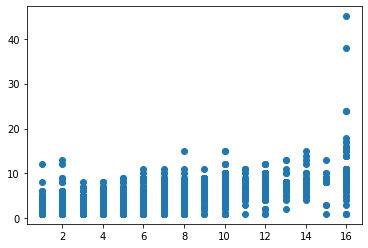

In [ ]:
plt.scatter(listings_numeric['accommodates'],listings_numeric['beds'])

There's no obvious indicator on how to fill column 'beds' with column 'accommodates'. So we leave it as is for now

Columns 'beds' and 'bedrooms' have only 165 null rows that overlap

In [ ]:
listings_numeric[(listings_numeric.beds.isna()) & (listings_numeric.bedrooms.isna())].shape[0]

165

In [ ]:
listings_numeric.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,number_of_amenities,description_len,host_about_len
count,7.191900e+04,7.191900e+04,7.191900e+04,44927.000000,47898.000000,71919.000000,71919.000000,71919.000000,71919.000000,71919.000000,...,53800.000000,53797.000000,71919.000000,71919.000000,71919.000000,71919.00000,54808.000000,71919.000000,71919.000000,71919.000000
mean,1.906924e+17,2.022121e+13,1.301971e+08,0.936526,0.834333,30.764443,57.907090,51.509795,-0.128060,3.083427,...,4.736295,4.615680,12.693210,9.537772,3.002906,0.02361,0.926542,408.140185,110.183734,32.438716
std,3.089368e+17,0.000000e+00,1.448678e+08,0.168812,0.248880,170.771867,351.068646,0.048224,0.098938,1.928148,...,0.415507,0.517304,39.948173,34.143329,16.007007,0.31398,1.298294,270.518247,54.262160,57.183082
min,1.391300e+04,2.022121e+13,2.594000e+03,0.000000,0.000000,1.000000,1.000000,51.295937,-0.497800,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.010000,2.000000,1.000000,0.000000
25%,1.901341e+07,2.022121e+13,1.910837e+07,0.970000,0.750000,1.000000,1.000000,51.483450,-0.189620,2.000000,...,4.660000,4.500000,1.000000,0.000000,0.000000,0.00000,0.130000,196.000000,67.000000,1.000000
50%,3.666197e+07,2.022121e+13,6.250644e+07,1.000000,0.960000,2.000000,2.000000,51.513780,-0.125750,2.000000,...,4.860000,4.750000,1.000000,1.000000,0.000000,0.00000,0.470000,337.000000,118.000000,5.000000
75%,5.940901e+17,2.022121e+13,2.072321e+08,1.000000,1.000000,5.000000,8.000000,51.539796,-0.068250,4.000000,...,5.000000,5.000000,4.000000,2.000000,1.000000,0.00000,1.150000,557.000000,161.000000,43.000000
max,7.781518e+17,2.022121e+13,4.908020e+08,1.000000,1.000000,1935.000000,24032.000000,51.681142,0.288570,16.000000,...,5.000000,5.000000,281.000000,278.000000,206.000000,11.00000,48.000000,2251.000000,217.000000,2002.000000


# Overview

Let's create a color map for Airbnb

In [ ]:
# define the base color
base_color = '#ff5a5f'

# define the colors for the colormap
colors = [(1, 1, 1), mcolors.hex2color(base_color), (0.6, 0.05, 0.05)]
# colors = [(0.7, 0.7, 0.7), mcolors.hex2color(base_color), (0, 0, 0)]

# create the colormap
cmap_name = 'my_cmap'
my_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# plot a colorbar to show the colormap
fig, ax = plt.subplots()
sm = plt.cm.ScalarMappable(cmap=my_cmap)
sm.set_array([])
plt.colorbar(sm, ax=ax)
ax.set_title('My Gradient Colormap')
plt.show()

NameError: ignored

Define main colors to be used in the charts to be used later

In [ ]:
text_color = '#696667'    # grey for text
support_color = '#ffe3e4' # lighter than the base color
support_color1 = '#ff9598' # lighter than the base color
support_color2 ='#fdbb84' # light orange
dark_grey = '#696667'
light_grey =  '#ccc8c9'

Create a new dataframe from listings with the number of total listings per neighbourhood

In [ ]:
nbh = listings.neighbourhood_cleansed.value_counts().reset_index()
nbh.rename(columns = {'index' : 'neighbourhood', 'neighbourhood_cleansed' : 'total_listings'}, inplace = True)
nbh.sample(3)

,neighbourhood,total_listings
30,Bexley,349
16,Greenwich,1579
14,Ealing,1746


Add column 'inner_outer' in the new dataframe nbn to categorise whether the neighbourhood belongs to Inner London or Outer London

In [ ]:
nbh['inner_outer'] = nbh['neighbourhood'].apply(lambda x: 'Inner London' if x in inner else 'Outer London')

Create a new dataframe that merge df 'nbn' above with df 'geo' which contains the geospatial data of the neighbourhoods

In [ ]:
geodata = geo.merge(nbh, how='inner', on='neighbourhood')
geodata.sample(3)

,neighbourhood,neighbourhood_group,geometry,total_listings,inner_outer
5,Havering,NaN,"MULTIPOLYGON (((0.15869 51.51219, 0.15871 51.5...",309,Outer London
17,Greenwich,NaN,"MULTIPOLYGON (((-0.02485 51.48555, -0.02479 51...",1579,Inner London
7,Harrow,NaN,"MULTIPOLYGON (((-0.40407 51.61318, -0.40320 51...",421,Outer London


Create a df called 'overview_geodata' which contains only 2 rows, one for Inner London and the other for Outer London

In [ ]:
overview_geodata = geodata.groupby('inner_outer').total_listings.sum().reset_index()
overview_geodata

,inner_outer,total_listings
0,Inner London,53477
1,Outer London,18448


Use unary_union to combine all the Multipolygon of inner neigbourhoods into 1 block, which is inner london polygon.
Apply the same for Outer London, the result will be a map of London with 2 blocks: Inner and Outer London

In [ ]:
inner_geometry = geodata[geodata.inner_outer == 'Inner London'].geometry.unary_union
outer_geometry = geodata[geodata.inner_outer == 'Outer London'].geometry.unary_union

In [ ]:
overview_geodata['geometry'] = [inner_geometry,outer_geometry]

Create the dataframe to plot the overview map of London 

In [ ]:
# Create new column with value = point at the center of the polygon
overview_geodata['coords'] = overview_geodata['geometry'].apply(lambda x: x.representative_point().coords[:])

# overview_geodata['coords'] values is a list containing only one tuple
# Remove the [] sign so overview_geodat['coords'] become a tuple
overview_geodata['coords'] = [coords[0] for coords in overview_geodata['coords']]

overview_geodata

,inner_outer,total_listings,geometry,coords
0,Inner London,53477,"MULTIPOLYGON (((-0.221726 51.470935, -0.22039 ...","(-0.056227521386374824, 51.461246)"
1,Outer London,18448,"POLYGON ((-0.160626 51.323243, -0.162221 51.32...","(-0.37194187500000025, 51.489299)"


In [ ]:
overview_geodata = GeoDataFrame(overview_geodata)

Plot the map of London with 2 blocks: Inner and Outer London and the number of listings of each region

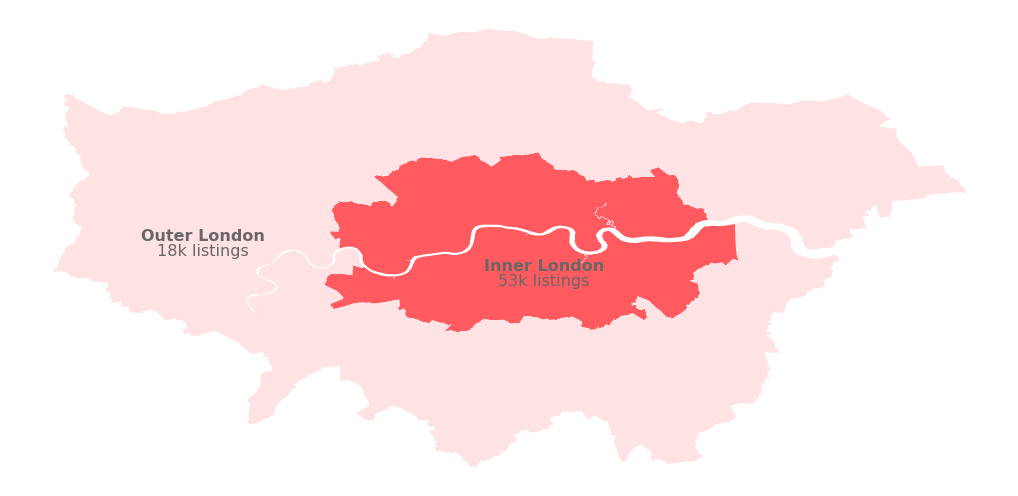

In [ ]:
# create a colormap with the two colors
PALETTE = mcolors.ListedColormap([support_color, base_color])


fig,ax = plt.subplots(figsize = (18,12))
overview_geodata.plot(
            column = overview_geodata['total_listings'],
             cmap = PALETTE,
             ax=ax
             )

ax.axis('off')

for idx, row in overview_geodata.iterrows():

  hue = round(row['total_listings'],0)
  plt.text(s= row['inner_outer'], x = row['coords'][0], y = row['coords'][1] + 0.007,
           horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 16, 'color':text_color, 'family':'lato'})

  plt.text(s= f'{hue/1000:,.0f}' +'k listings' , x=row['coords'][0],y = row['coords'][1] - 0.007 ,
          horizontalalignment='center', fontdict = {'size': 16,'color':text_color,'family':'lato'})
  
plt.show()

Print some main information about the London Airbnb listings

In [ ]:
print('{}k listings'.format(round(listings.shape[0]/1000)))

72k listings


In [ ]:
print('{}k listings in Inner London'.format(round(overview_geodata.loc[overview_geodata.inner_outer == 'Inner London', 'total_listings'].item()/1000)))

53k listings in Inner London


In [ ]:
print('{}k listings in Outer London'.format(round(overview_geodata.loc[overview_geodata.inner_outer == 'Outer London', 'total_listings'].item()/1000)))

18k listings in Outer London


In [ ]:
print('{}k hosts'.format(round(listings.host_id.nunique()/1000)))

46k hosts


In [ ]:
print('£{} Average price'.format(round(listings.price.mean())))
print('£{} Median price'.format(round(listings.price.median())))

£179 Average price
£100 Median price


In [ ]:
print('{} average reviews'.format(round(listings.number_of_reviews.mean())))

18 average reviews


In [ ]:
print('{}k hosts with Single listings'.format(round(listings[listings.calculated_host_listings_count == 1].shape[0]/1000)))
print('{}k hosts with Multiple listings'.format(round(listings.host_id.nunique()/1000 - listings[listings.calculated_host_listings_count == 1].shape[0]/1000)))

38k hosts with Single listings
8k hosts with Multiple listings


In [ ]:
print('{}k Superhosts'.format(round(listings[listings.host_is_superhost == True]['host_id'].nunique()/1000)))

5k Superhosts


In [ ]:
print('{}k Superhost with Single listings'.format(round(listings[(listings.calculated_host_listings_count == 1) & (listings.host_is_superhost == True)].shape[0]/1000)))

4k Superhost with Single listings


**Room Type overview**

Get the number of listings per room_type

In [ ]:
# Get the room type counts
room_type_counts = listings.room_type.value_counts().sort_values()
room_type_counts

Hotel room           208
Shared room          383
Private room       28258
Entire home/apt    43076
Name: room_type, dtype: int64

Plot a bar chart to show the number of listings per room_type

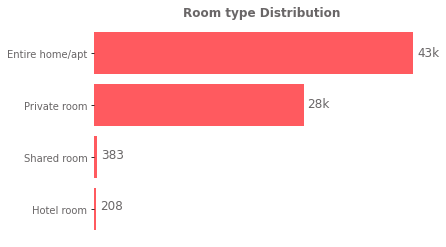

In [ ]:
# Create horizontal bar plot
fig, ax = plt.subplots()
ax.barh(room_type_counts.index, room_type_counts.values, color = base_color)

# Add title
ax.set_title('Room type Distribution',
             color = text_color,
             fontweight = 'bold')

# Remove border
ax.spines[['right','left','top','bottom']].set_visible(False)

# Remove labels
ax.set_xlabel('')
ax.set_ylabel('')

# Remove y ticks and y ticks labels
ax.set_xticks([])
ax.set_xticklabels([])

# set the color of the yticks and ytick labels
ax.tick_params(axis='y', which='both', labelcolor=text_color)

# Add text
for j, counts in enumerate(room_type_counts.values):
  if counts < 1000:
    ax.text(counts+500,j/1.02 , '{}'.format(counts), fontsize=12, color=text_color, ha="left")
  else:
    ax.text(counts+500,j/1.02 , '{}k'.format(int(counts/1000)), fontsize=12, color=text_color, ha="left")

plt.show()

**Hosts overview**

Let's get an overview about London Airbnb hosts.
Who are they? Individual or Professional hosts
Are they maniging one single listings or investors who manages multiple listings?

Create a new column type bolean on whether the host manages 1 single listing or multiple listings

In [ ]:
# listings['host_with_single_listing'] = listings.calculated_host_listings_count == 1
listings['host_with_multiple_listing'] = listings.calculated_host_listings_count > 1

Create a overview dataframe about the hosts

In [ ]:
# host_overview_df = listings[['host_with_single_listing','host_is_superhost','host_id']].drop_duplicates()
host_overview_df = listings[['host_with_multiple_listing','host_is_superhost','host_id']].drop_duplicates()
host_overview_df

,host_with_multiple_listing,host_is_superhost,host_id
0,True,False,54730
1,False,False,60302
2,False,False,806983
3,True,False,813141
4,True,True,157884
...,...,...,...
71930,False,False,490303423
71932,False,False,490801989
71933,False,False,490380148
71934,False,False,24084245


In [ ]:
# group the data and calculate the count of hosts in each group
# grouped = host_overview_df.groupby(['host_with_single_listing', 'host_is_superhost'])['host_id'].count().unstack()
grouped = host_overview_df.groupby(['host_with_multiple_listing', 'host_is_superhost'])['host_id'].count().unstack()
grouped = grouped.iloc[::-1,::-1]
grouped

host_is_superhost,True,False
host_with_multiple_listing,,
True,1740,6435
False,3528,34677


Plot a stacked bar chart to show the number of hosts with single listing versus multiple listings, and also the number of superhosts among each group

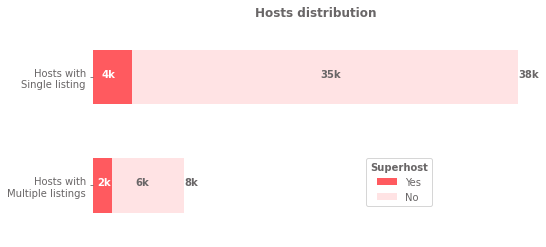

In [ ]:
# plot the stacked horizontal bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(8,4), color=[base_color, support_color], edgecolor='none')

# ax.set_xlabel('46k hosts for 71k listings in total', fontsize = 12, color = text_color, fontweight='bold')
ax.set_ylabel('')

# add the number of hosts for each bar
for i, v in enumerate(grouped.sum(axis=1)):
    ax.text(v+0.5, i, str('{}k'.format(round(v/1000))), color=text_color, fontweight='bold')

# add the number of hosts with superhost status
for i, v in enumerate(grouped[True]):
    ax.text(v/4.5, i, str('{}k'.format(round(v/1000))), color='white', fontweight='bold')

# add the number of hosts with NO superhost status
for i, v in enumerate(grouped[False]):
    ax.text(v/1.7, i, str('{}k'.format(round(v/1000))), color=text_color, fontweight='bold')

# add title
ax.set_title('Hosts distribution', color=text_color, fontweight='bold', fontsize = 12)

# remove the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# remove ticks and tick labels on the bottom and left sides
ax.tick_params(bottom=False, labelbottom=False, colors=text_color, labelcolor=text_color)

# set ticks label
ax.set_yticklabels(['Hosts with\nMultiple listings','Hosts with\nSingle listing'])

# set the legend
ax.legend(title='Superhost', bbox_to_anchor=(0.6, 0.4), loc='upper left')
legend = ax.get_legend()
legend.get_title().set_color(text_color)
legend.get_title().set_fontweight('bold')
for text in legend.get_texts():
    text.set_color(text_color)
    text.set_text(text.get_text().replace('True', 'Yes').replace('False', 'No'))

plt.show()

# Inner London - Overview

Now that we have an overview on the London Airbnb market, let's take a closer look at Inner London

Similar to the map above, let's plot a map of all Inner London boroughs and their density (number of listings)

In [ ]:
inner_geodata = geodata[geodata.inner_outer == 'Inner London']

In [ ]:
inner_geodata['coords'] = inner_geodata['geometry'].apply(lambda x: x.centroid.coords[:])
inner_geodata['coords'] = [coords[0] for coords in inner_geodata['coords']]

Let's find the coordinates of London main attractions and plot in the same map

In [ ]:
from geopy.geocoders import Nominatim

attractions_list = ['Buckingham Palace', 'Tower Bridge', 'Big Ben', 'London Eye', 'British Museum', 'Tate Modern', 'St. Paul\'s Cathedral', 'Westminster Abbey', 'Hyde Park', 'National Gallery']

geolocator = Nominatim(user_agent='myapp')

west_attractions= []

for attraction in attractions_list:
    location = geolocator.geocode(attraction + ', London')
    west_attractions.append((attraction, location.latitude, location.longitude))
west_attractions


[('Buckingham Palace', 51.500841300000005, -0.14298629208606997),
 ('Tower Bridge', 51.5055166, -0.0753662),
 ('Big Ben', 51.5007042, -0.1245721),
 ('London Eye', 51.5033416, -0.11967649999999999),
 ('British Museum', 51.51929365, -0.12801772178494725),
 ('Tate Modern', 51.5074293, -0.09934164882888792),
 ("St. Paul's Cathedral", 51.51378715, -0.09845055141832956),
 ('Westminster Abbey', 51.499399, -0.1273910483333311),
 ('Hyde Park', 51.5074889, -0.16223668308067218),
 ('National Gallery', 51.508881, -0.12838264338231645)]

Add some attractions/relevant addresses of East London

In [ ]:
east_attractions_list = ['Royal Observatory','Canary Wharf', 'Elizabeth park']

geolocator = Nominatim(user_agent='myapp')

east_attractions= []

for attraction in east_attractions_list:
    location = geolocator.geocode(attraction + ', London')
    east_attractions.append((attraction, location.latitude, location.longitude))
east_attractions

[('Royal Observatory', 51.47736225, -0.000845593094199643),
 ('Canary Wharf', 51.5048954, -0.0190006),
 ('Elizabeth park', 51.5401287, -0.010554105116155059)]

Plot the Inner London Airbnb listings and attractions map

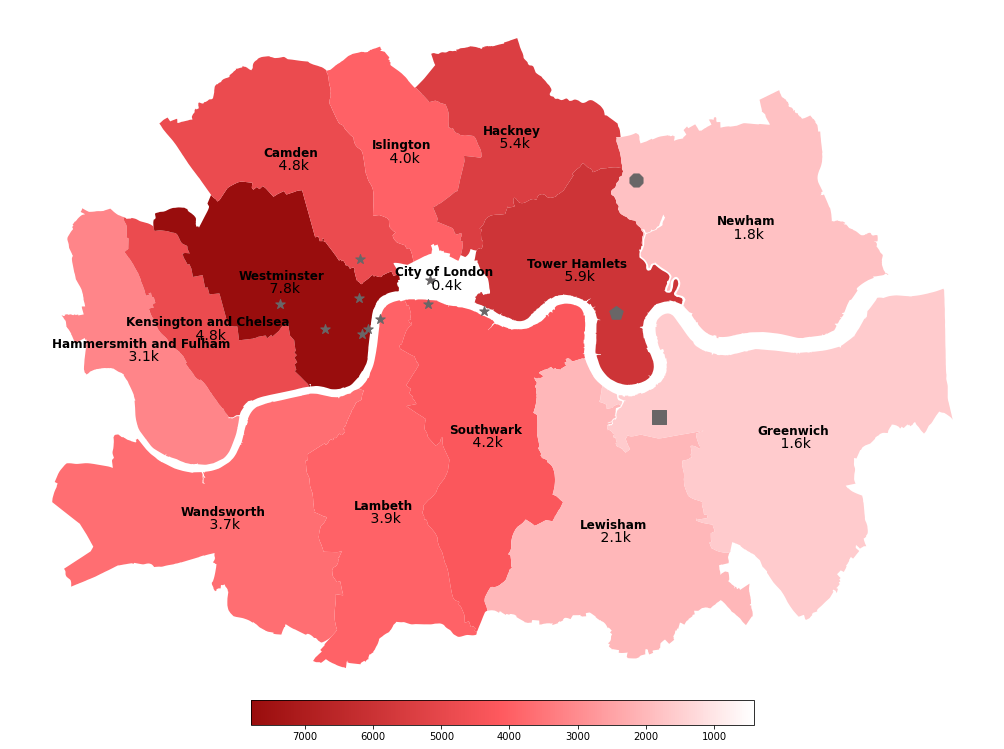

In [ ]:
fig,ax = plt.subplots(figsize=(30,15))
inner_geodata.plot(column = inner_geodata['total_listings'],
             cmap = my_cmap,
             ax=ax
             )

# create a ScalarMappable object from the colormap
sm = plt.cm.ScalarMappable(cmap=my_cmap)
sm.set_array(inner_geodata['total_listings'])

# add a color bar
cbar = fig.colorbar(sm, ax=ax,orientation='horizontal',shrink=0.3, pad = 0.0001)
cbar.ax.invert_xaxis()

for idx, row in inner_geodata.iterrows():

  hue = round(row['total_listings'],0)
  plt.text(s=row['neighbourhood'], x = row['coords'][0], y = row['coords'][1],
           horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 12})
  
  plt.text(s=' ' + f'{hue/1000:,.1f}' +'k', x=row['coords'][0],y = row['coords'][1] - 0.0035 ,
          horizontalalignment='center', fontdict = {'size': 14})    

ax.axis('off')

# Add west attractions
for attraction in west_attractions:
  # Create a dictionary with the coordinates of the atraction
  attraction_coords = {'lat': attraction[1], 'lon': attraction[2]}
  # Create a GeoDataFrame with the coordinates
  attraction_point = gpd.GeoDataFrame({'geometry': [Point(attraction_coords['lon'], attraction_coords['lat'])]}, crs='EPSG:4326')
  attraction_point.plot(ax=ax, marker='*', color=text_color, markersize=100)

# Add east attractions
markers_list = ['s','p','8']
for attraction in east_attractions:
  # Create a dictionary with the coordinates of the atraction
  attraction_coords = {'lat': attraction[1], 'lon': attraction[2]}
  # Create a GeoDataFrame with the coordinates
  attraction_point = gpd.GeoDataFrame({'geometry': [Point(attraction_coords['lon'], attraction_coords['lat'])]}, crs='EPSG:4326')
  attraction_point.plot(ax=ax, marker=markers_list[east_attractions.index(attraction)], color=text_color, markersize=200)

plt.show()

The darker the color, the higher the density.
 

*   Westminster, whichs is the closest to the main attractions has obviously the highest density.
*   North West London has a higher density than South East London
* City of London, despite being at the central of london has the lowest density because this is the Financial District with mainly office buildings




# Outer London - Overview

Let's create the same map for Outer London

In [ ]:
outer_geodata = geodata[geodata.inner_outer == 'Outer London']

In [ ]:
outer_geodata['coords'] = outer_geodata['geometry'].apply(lambda x: x.centroid.coords[:])
outer_geodata['coords'] = [coords[0] for coords in outer_geodata['coords']]

Let's find the coordinate of sone key areas in Outer London such as Heathrow Airpot, Croydon station

In [ ]:
from geopy.geocoders import Nominatim

outer_attractions_list = ['Kew Gardens', 'Heathrow Airport', 'Croydon Station']

geolocator = Nominatim(user_agent='myapp')

outer_attractions= []

for attraction in outer_attractions_list:
    location = geolocator.geocode(attraction + ', London')
    outer_attractions.append((attraction, location.latitude, location.longitude))
outer_attractions


[('Kew Gardens', 51.478197449999996, -0.2968860852596966),
 ('Heathrow Airport', 51.46773895, -0.4587800741571181),
 ('Croydon Station', 51.378808, -0.1020387)]

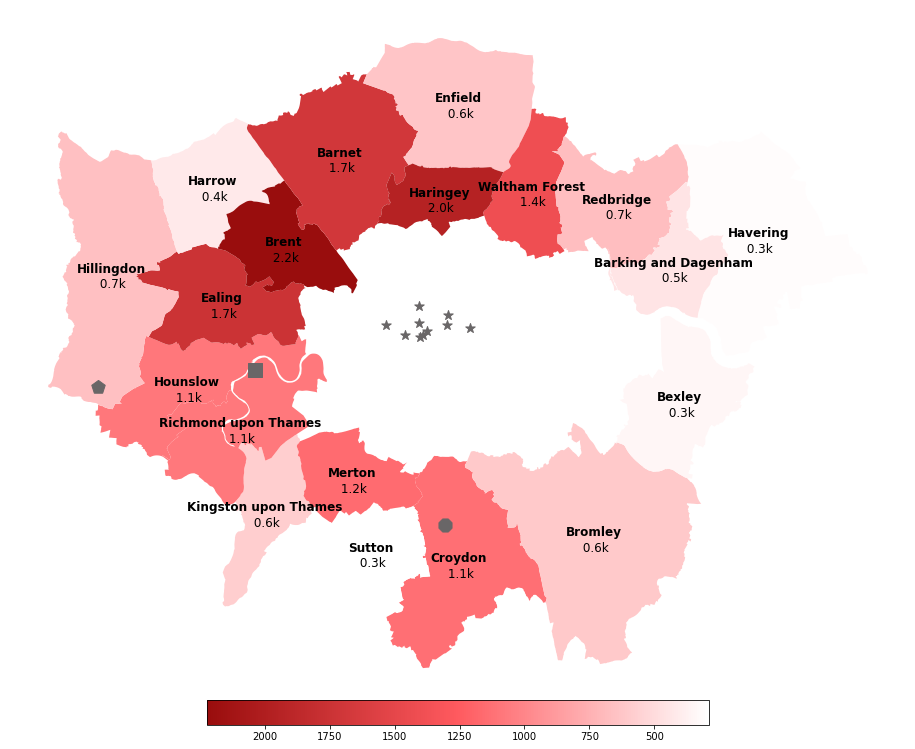

In [ ]:
fig,ax = plt.subplots(figsize=(30,15))
outer_geodata.plot(column = outer_geodata['total_listings'],
             cmap = my_cmap,
             ax=ax)

# create a ScalarMappable object from the colormap
sm = plt.cm.ScalarMappable(cmap=my_cmap)
sm.set_array(outer_geodata['total_listings'])

# add a color bar
cbar = fig.colorbar(sm, ax=ax, orientation = 'horizontal', pad = 0.0001,shrink = 0.3)
cbar.ax.invert_xaxis()

for idx, row in outer_geodata.iterrows():

  hue = round(row['total_listings'],0)
  plt.text(s=row['neighbourhood'], x = row['coords'][0], y = row['coords'][1],
            horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 12})
  plt.text(s=' ' + f'{hue/1000:,.1f}' +'k', x=row['coords'][0],y = row['coords'][1] - 0.01 ,
            horizontalalignment='center', fontdict = {'size': 12})  



ax.axis('off')

# Add inner attractions
for attraction in west_attractions:
  # Create a dictionary with the coordinates of the atraction
  attraction_coords = {'lat': attraction[1], 'lon': attraction[2]}
  # Create a GeoDataFrame with the coordinates
  attraction_point = gpd.GeoDataFrame({'geometry': [Point(attraction_coords['lon'], attraction_coords['lat'])]}, crs='EPSG:4326')
  attraction_point.plot(ax=ax, marker='*', color=text_color, markersize=100)

# Add outer attractions
markers_list = ['s','p','8']
for attraction in outer_attractions:
  # Create a dictionary with the coordinates of the atraction
  attraction_coords = {'lat': attraction[1], 'lon': attraction[2]}
  # Create a GeoDataFrame with the coordinates
  attraction_point = gpd.GeoDataFrame({'geometry': [Point(attraction_coords['lon'], attraction_coords['lat'])]}, crs='EPSG:4326')
  attraction_point.plot(ax=ax, marker=markers_list[outer_attractions.index(attraction)], color=text_color, markersize=200)

plt.show()

Outer London follows the same trends as Inner London with higher density in North West and lower in South East


*   Hounslow and Richmond, being at the middle of Hearthrow Airport and Central London have a significant number of listings
*   Croydon in the South of London has also a quite high number of listings, thanks to the efficient transport link to London



# Inner London - Camden

After getting to know the Airbnb markets in Inner and Outer London, let's try to find out how one can identify a good area to start their Airbnb hosting business.

One of the criteria to use can be comparing the relative supply (via the number of listings) and demand (via the number of reviews)

In [ ]:
listings_inner = listings[listings.neighbourhood_cleansed.isin(inner)]

In [ ]:
nbh_reviews_listings = listings[listings.inner_outer == 'Inner London'].groupby('neighbourhood_cleansed').agg({'id':'count','number_of_reviews':'sum'}).sort_values(by='id', ascending = False).reset_index()
nbh_reviews_listings.rename(columns ={'id' : 'number_of_listings'}, inplace = True)

Let's create a df called 'nbn_reviews_listings' that shows the number of listings and number of reviews per Inner London borough

In [ ]:
nbh_reviews = listings_inner.groupby('neighbourhood_cleansed').number_of_reviews.sum().reset_index()
nbh_listings = listings_inner.groupby('neighbourhood_cleansed').id.count().sort_values(ascending=False).reset_index()
nbh_listings.rename(columns = {"id" : "number_of_listings"}, inplace = True)
nbh_reviews_listings = nbh_listings.merge(nbh_reviews, how = 'inner', on = 'neighbourhood_cleansed')
nbh_reviews_listings

,neighbourhood_cleansed,number_of_listings,number_of_reviews
0,Westminster,7785,166185
1,Tower Hamlets,5891,98584
2,Hackney,5402,80118
3,Camden,4822,113956
4,Kensington and Chelsea,4794,86824
5,Southwark,4236,84146
6,Islington,3952,80043
7,Lambeth,3910,81625
8,Wandsworth,3659,59182
9,Hammersmith and Fulham,3139,59196


Camden is the 2nd borough in terms of number of reviews, while the number of listings is relatively low, only at the 4th place in terms of density.

This means that there's a relatively high demand for this area, therefore Camden can be a good place to start an Airbnb Hosting business.

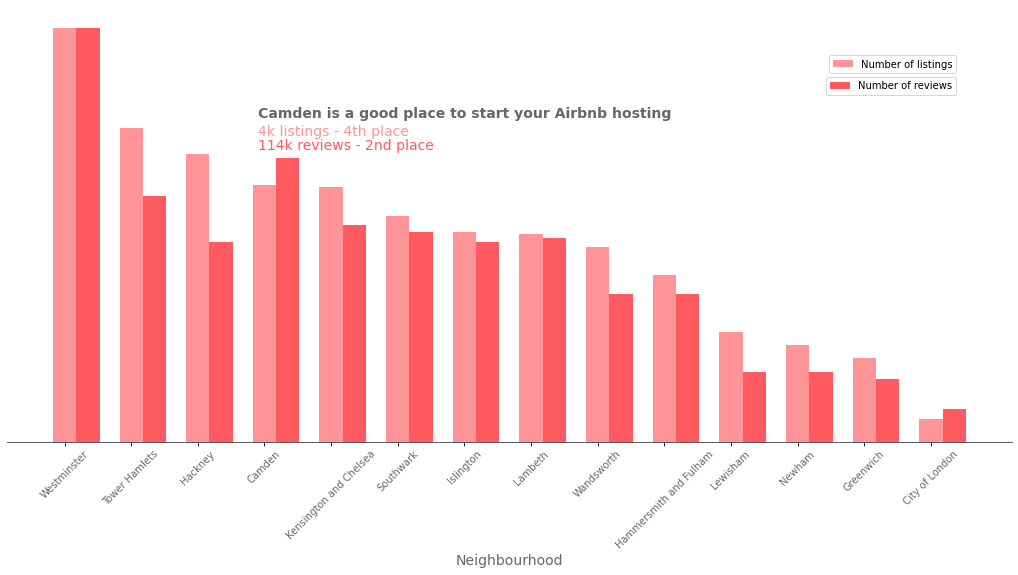

In [ ]:
# Assign values to x,y1,y2
x = nbh_reviews_listings.neighbourhood_cleansed
y1 = nbh_reviews_listings.number_of_listings
y2 = nbh_reviews_listings.number_of_reviews

# Define format
def thousand_fmt(x, pos):
    return '{:.0f}K'.format(x/1000)

# Create subplots
fig, ax1 = plt.subplots(figsize=(18, 8))
# fig.suptitle('Number of Listings & Reviews per Neighbourhood', fontsize=16, color='dimgray')

# Define bar with and position to avoid overlap
bar_width = 0.35
x_pos = np.arange(len(x))

# Plot the number of listings
ax1.bar(x_pos, y1, width=bar_width, label = 'Number of listings',color=support_color1)
ax1.set_xlabel('Neighbourhood', fontsize=14, color=text_color)

# xticks
plt.xticks(x_pos, x, rotation=45, fontsize=10, color=text_color)

# Remove y ticks
ax1.set_yticks([])

# Plot the number of reviews
ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width, y2, width=bar_width, label = 'Number of reviews',color=base_color)

# Remove y axis, ticks and label
ax2.set_yticks([])

# Add text and legends
ax2.text(2.9, 130000, 'Camden is a good place to start your Airbnb hosting', fontsize=14, color=text_color, fontweight='bold')
ax2.text(2.9, 123000, '4k listings - 4th place', fontsize=14, color=support_color1)
ax2.text(2.9, 117000, '114k reviews - 2nd place', fontsize=14, color=base_color)

ax1.legend(loc='upper right', bbox_to_anchor=(0.95,0.9))
ax2.legend(loc='upper right', bbox_to_anchor=(0.95,0.85))

# Remove the borders of the plot
ax1.spines[['top','left','right']].set_visible(False)
ax2.spines[['top','left','right']].set_visible(False)

# Set bottom spines color
ax2.spines['bottom'].set_color(text_color)

plt.show()

**Plot Inner London geomap highlighting Camden**

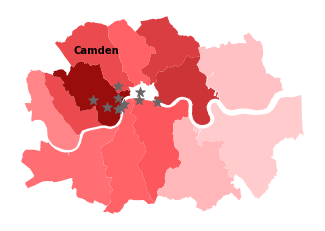

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
inner_geodata.plot(column = inner_geodata['total_listings'],
             cmap = my_cmap,
             ax=ax
             )

# create a ScalarMappable object from the colormap
sm = plt.cm.ScalarMappable(cmap=my_cmap)
sm.set_array(inner_geodata['total_listings'])

# add a color bar
# cbar = fig.colorbar(sm, ax=ax,orientation='horizontal',shrink=0.3, pad = 0.0001)
# cbar.ax.invert_xaxis()

for idx, row in inner_geodata.iterrows():
  if row['neighbourhood'] == 'Camden':
    plt.text(s=row['neighbourhood'], x = row['coords'][0], y = row['coords'][1],
            horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 10})

ax.axis('off')

# Add west attractions
for attraction in west_attractions:
  # Create a dictionary with the coordinates of the atraction
  attraction_coords = {'lat': attraction[1], 'lon': attraction[2]}
  # Create a GeoDataFrame with the coordinates
  attraction_point = gpd.GeoDataFrame({'geometry': [Point(attraction_coords['lon'], attraction_coords['lat'])]}, crs='EPSG:4326')
  attraction_point.plot(ax=ax, marker='*', color=text_color, markersize=100)

plt.show()

**Word cloud from Camden guest reviews**

Merge the listings and reviews dataframe, then filter on Camden to find out what guests like the most about Camden

In [ ]:
merged_df = listings.merge(reviews, left_on='id', right_on='listing_id')

In [ ]:
camden_reviews = merged_df[(merged_df.neighbourhood_cleansed == 'Camden') & (merged_df.comments.isna() == False)]

Find top 10 most common words used in the reviews about Camden

In [ ]:
# Find top 10 most common words used in the reviews
result_dict = {}
def count_word(x):
    words = x.split()
    for word in words:
        if word not in result_dict:
            result_dict[word] = 1
        elif word in result_dict:
            result_dict[word] += 1
camden_reviews["comments"].apply(count_word)
result_dict
s = pd.Series(result_dict).sort_values(ascending=False)[:10]
word_counts = s.to_dict()
word_counts

{'and': 208744,
 'the': 156445,
 'a': 132072,
 'to': 121652,
 'was': 95949,
 'is': 91559,
 'in': 76157,
 'very': 59573,
 'for': 56307,
 'of': 48938}

Remove the stop words and the words that are common to other boroughs

In [ ]:
# Remove stopwords
stops = stopwords.words("english")
stops.extend(['wa', 'veri', 'br', 'stay', 'locat', 'great', 'place', 'clean', 'host','london','room', 'flat', 'thi',
              'apart', 'nice', 'recommend', 'good', 'love', 'would', 'comfort', 'realli', 'de', 'well', 'need', 'perfect',
              'us','station', 'everyth', 'close', 'easi', 'help', 'commun', 'check', 'time', 'tube','bed', 'definit', 
              'thank', 'quiet', 'also', 'camden', 'la', 'et', 'minut', 'area', 'home', 'get', 'super', 'central', 'hous',
              'ha', 'highli', 'tr', 'friendli', 'bathroom', 'conveni','welcom', 'day', 'est', 'one', 'excel', 'onli', 
              'like', 'le', 'kitchen', 'enjoy', 'wonder', 'back', 'even', 'space', 'amaz', 'arriv', 'lot', 'beauti', 
              'un', 'small', 'could', 'around', 'accommod', 'l', 'made', 'away', 'spaciou', 'king', 'use',
              'fantast', 'come', 'littl', 'visit', 'en', 'access', 'cross', 'make','much', 'appart', 'feel', 'short', 
              'next', 'n', 'underground', 'min', 'two', 'go', 'airbnb', 'look', 'respons', 'bien', 'transport', 'work',
              'e', 'hi', 'near', 'shower', 'bu', 'book', 'town', 'experi', 'bedroom', 'ani', 'right', 'valu', 'kind',
              'citi', 'travel', 'want', 'park', 'equip', 'famili', 'bit', 'mani', 'quick', 'peopl', 'provid', 'distanc',
              'pour', 'nou', 'best', 'neighborhood', 'quit', 'thing', 'dure', 'alway', 'train', 'felt', 'garden', 'warm',
              'st', 'hampstead', 'befor', 'overal', 'find', 'trip','within', 'nearbi', 'que', 'floor', 'extrem', 'es',
              'price', 'person','question', 'und', 'enough', 'abl', 'amen', 'big', 'absolut', 'issu', 'expect', 'door', 
              'safe', 'cozi', 'first', 'comfi', 'sleep', 'stop', 'exactli', 'muy','paul', 'r', 'share', 'guest', 
              'respond', 'pancra', 'window', 'sure', 'cosi', 'ideal', 'nois', 'coupl', 'better', 'light', 'describ',
              'problem', 'pictur', 'el', 'avail', 'etc', 'breakfast', 'plenti', 'water', 'week', 'decor','build', 'dan', 'take', 'friend', 'explor', 'public',
              'everi', 'road', 'londr', 'die', 'line', 'money', 'studio', 'il', 'tidi', 'see', 'becaus', 'modern', 'spot',
              'larg', 'situ', 'jour','though', 'pa', 'anyon', 'c', 'part', 'une', 'open', 'morn', 'hotel', 'properti', 
              'way', 'quickli', 'pleasant', 'con','touch'

              ])
    


Define funtion clean_text to remove the stop words from the list of top 10 most common words

In [ ]:
def clean_text(x):
    # Remove HTML
    x = x.replace('\n', '')
    clean = re.sub("[^a-zA-Z]", " ", x).lower()

    # Stem and remove stopwords
    clean = [porter.stem(word) for word in clean.split() if porter.stem(word) not in stops]
    return " ".join(clean)


camden_reviews["comments"] = camden_reviews["comments"].apply(clean_text)


Apply function count_word to find out the top common words and store them in word_counts dictionary

In [ ]:
# Find top 13 most common words used in the clean_ingredients column
result_dict = {}
def count_word(x):
    words = x.split()
    for word in words:
        if word not in result_dict:
            result_dict[word] = 1
        elif word in result_dict:
            result_dict[word] += 1
camden_reviews["comments"].apply(count_word)
result_dict
s = pd.Series(result_dict).sort_values(ascending=False)[:13]
word_counts = s.to_dict()


Plot the word cloud

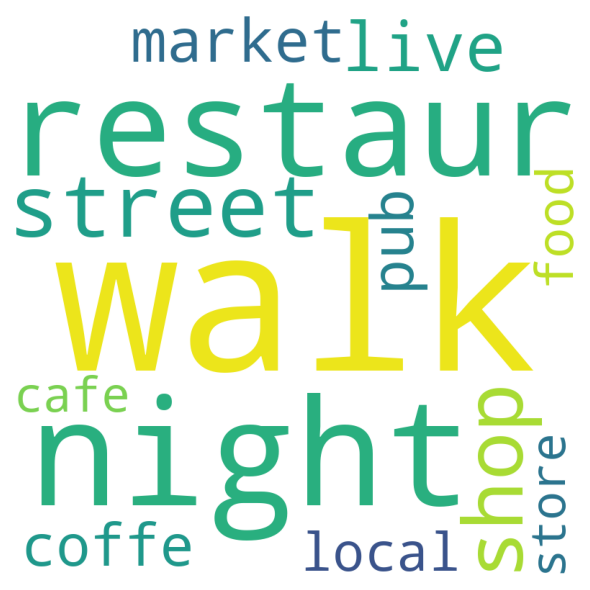

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10)

# Generate word cloud from dictionary
wordcloud.generate_from_frequencies(frequencies=word_counts)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Show the plot
plt.show()


The words that guests mention the most in their review are in line with the special characters of Camden, such as the Camden market, the original stores, coffee shops and restaurant, and also the night live with pubs, live concert, comedy clubs.

This suggests about Camden guests, they may be young people looking for original feature that Camden has to offer. Hosts may organise their listings accordingly to the tast of those potential guests

# Outer London - Richmond

When applying the same analysis for Outer London, we found out that Richmond is an area in Outer London with relatively higher demand than the current supply, and can be a very good place to start an Airbnb Hosting business.

This is not a surprive given the great location of Richmond between Hearthrow airport and Central London, and also its peaceful asmosphere with the Richmond park and Kew Garden nearby

In [ ]:
nbh_reviews_listings_outer = listings[listings.inner_outer == 'Outer London'].groupby('neighbourhood_cleansed').agg({'id':'count','number_of_reviews':'sum'}).sort_values(by='id', ascending = False).reset_index()
nbh_reviews_listings_outer.rename(columns ={'id' : 'number_of_listings'}, inplace = True)

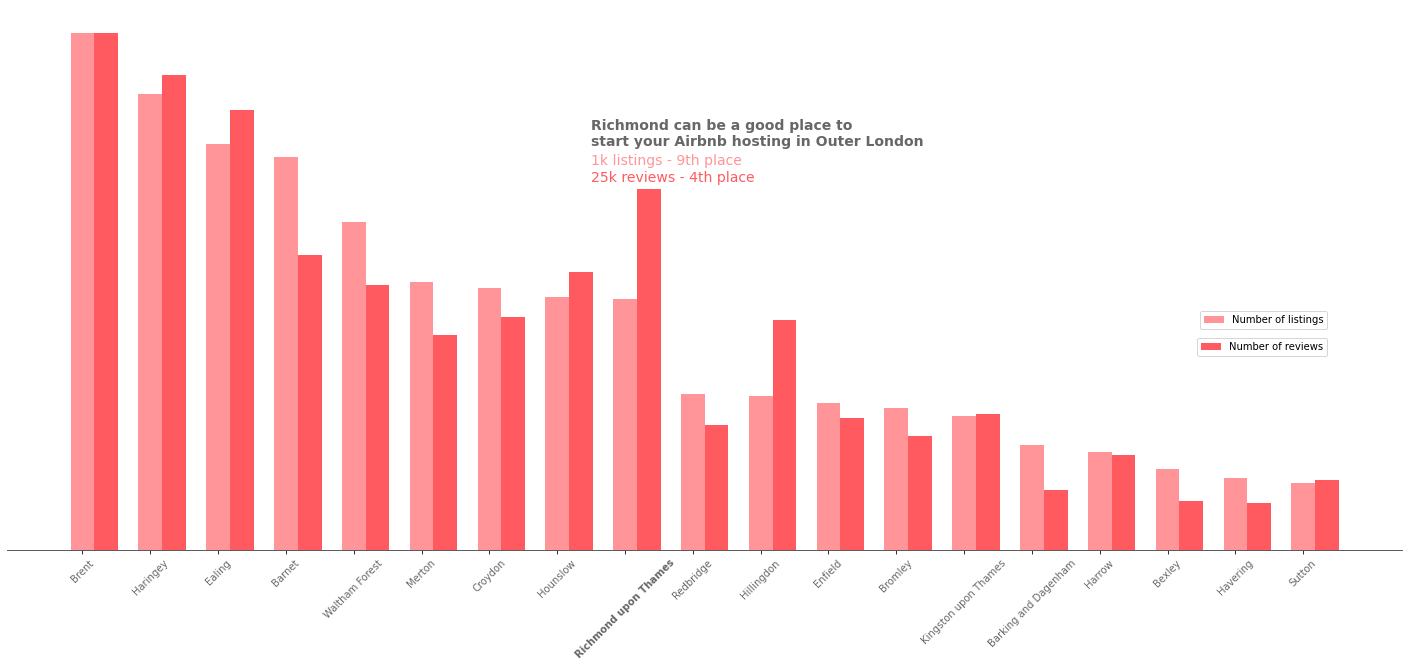

In [ ]:
# Assign values to x,y1,y2
x = nbh_reviews_listings_outer.neighbourhood_cleansed
y1 = nbh_reviews_listings_outer.number_of_listings
y2 = nbh_reviews_listings_outer.number_of_reviews

# Define format
def thousand_fmt(x, pos):
    return '{:.0f}K'.format(x/1000)

# Create subplots
fig, ax1 = plt.subplots(figsize=(25, 10))
# fig.suptitle('Number of Listings & Reviews per Neighbourhood', fontsize=16, color='dimgray')

# Define bar width and position to avoid overlap
bar_width = 0.35
x_pos = np.arange(len(x))


# Plot the number of listings
ax1.bar(x_pos, y1, width=bar_width, label='Number of listings', color=support_color1)
# ax1.set_xlabel('Neighbourhood', fontsize=14, color=text_color)
# ax1.set_ylabel('Number of listings', color=support_color1, fontweight='bold', fontsize=14)

# xticks
plt.xticks(x_pos, x, rotation=45, fontsize=10, color=text_color)

# ax1 yticks
# ax1.tick_params(axis='y', labelcolor=support_color1)
# ax1.yaxis.set_major_formatter(mtick.FuncFormatter(thousand_fmt))
ax1.set_yticks([])
ax1.set_yticklabels([])

# Plot the number of reviews
ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width, y2, width=bar_width, label='Number of reviews', color=base_color)
# ax2.set_ylabel('Number of reviews', color=base_color, fontweight='bold', fontsize=14)

# ax2 yticks
# ax2.tick_params(axis='y', labelcolor=base_color)
# ax2.yaxis.set_major_formatter(mtick.FuncFormatter(thousand_fmt))

# Remove y ticks and y ticks labels
ax2.set_yticks([])
ax2.set_yticklabels([])

# Add legends
ax2.text(7.5, 27500, 'Richmond can be a good place to \nstart your Airbnb hosting in Outer London', fontsize=14, color=text_color, fontweight='bold')
ax2.text(7.5, 26200, '1k listings - 9th place', fontsize=14, color=support_color1)
ax2.text(7.5, 25100, '25k reviews - 4th place', fontsize=14, color=base_color)


# Set the font weight of the xtick label for 'Richmond upon Thames' to bold
xtick_labels = ax1.get_xticklabels()
for i, label in enumerate(xtick_labels):
    if label.get_text() == 'Richmond upon Thames':
        xtick_labels[i].set_weight('bold')


ax1.legend(loc='upper right', bbox_to_anchor=(0.95,0.45))
ax2.legend(loc='upper right', bbox_to_anchor=(0.95,0.4))

# Remove the border of the plot
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.spines['bottom'].set_color(text_color)



plt.show()

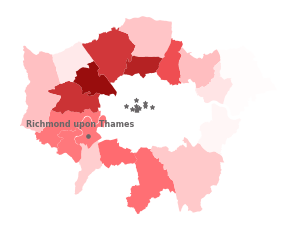

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
outer_geodata.plot(column = outer_geodata['total_listings'],
             cmap = my_cmap,
             ax=ax)


for idx, row in outer_geodata.iterrows():
  if row['neighbourhood'] == 'Richmond upon Thames':
    plt.text(s=row['neighbourhood'], x = row['coords'][0], y = row['coords'][1]+0.025,
              horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 8,'color':text_color})
    richmond_point = gpd.GeoDataFrame({'geometry': [Point(row['coords'][0]+0.025, row['coords'][1]+0.005)]}, crs='EPSG:4326')

    richmond_point.plot(ax=ax, marker='.', color=text_color, markersize=50)

ax.axis('off')

# Add inner attractions
for attraction in west_attractions:
  # Create a dictionary with the coordinates of the atraction
  attraction_coords = {'lat': attraction[1], 'lon': attraction[2]}
  # Create a GeoDataFrame with the coordinates
  attraction_point = gpd.GeoDataFrame({'geometry': [Point(attraction_coords['lon'], attraction_coords['lat'])]}, crs='EPSG:4326')
  attraction_point.plot(ax=ax, marker='*', color=text_color, markersize=20)


plt.show()

# Listing Details

**Listings near attractions - It's important to mention the great location in the description**

When filtering out the listings that are near the main attractions, we found out that those that mention their proximity to main attractions have much more reviews than who don't.

In this case, by mentioning your proximit to the main attraction, the median number of reviews you can get is 9, against only 2 reviews if you don't mention about the great location of your listing 

In [ ]:
from geopy.distance import distance

# Define a function to calculate the distance between two points in meters
def calc_distance(lat1, lon1, lat2, lon2):
    return distance((lat1, lon1), (lat2, lon2)).meters

# Filter the listings within 2 miles of any of the main attractions
listings_near_attractions = listings[listings.apply(lambda x: any([calc_distance(x['latitude'], x['longitude'], attraction[1], attraction[2]) <= 3218.69 for attraction in west_attractions]), axis=1)]




In [ ]:
# Listings without neighbourhood description
listings_near_attractions.neighborhood_overview.isna().sum()

10851

In [ ]:
listings_near_attractions['listing_has_neighbourhood_overview'] = listings_near_attractions.neighborhood_overview.notnull()

In [ ]:
near_attractions_neighborhood_overview = listings_near_attractions.groupby('listing_has_neighbourhood_overview').number_of_reviews.median().reset_index()
near_attractions_neighborhood_overview

,listing_has_neighbourhood_overview,number_of_reviews
0,False,2.0
1,True,9.0


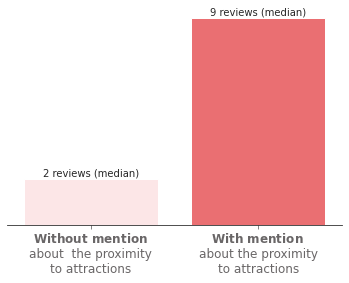

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()

# set the color palette
colors = [support_color,base_color]

sns.barplot(x='listing_has_neighbourhood_overview', y='number_of_reviews', data=near_attractions_neighborhood_overview, palette=colors)

# set plot title and axis labels
# plt.title('Get more reviews by mentioning the proximity to attractions in your listing!', color = text_color, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')

# Remove border
sns.despine(left=True)

# Change the color of the tick labels
ax.tick_params(axis='both', colors=text_color)

# set x ticks label
xticklabels = ['Without mention \nabout  the proximity\nto attractions', 'With mention \nabout the proximity\nto attractions']
ax.set_xticklabels(xticklabels)


# set the font properties for the original labels
font_prop = font_manager.FontProperties(weight='normal', size=12)

# create new labels with bold font weight for the substrings
new_labels = []
for label in xticklabels:
    if 'Without mention' in label:
        new_label = label.replace('Without mention', r'$\bf{Without\ mention}$')
    elif 'With mention' in label:
        new_label = label.replace('With mention', r'$\bf{With\ mention}$')
    else:
        new_label = label
    new_labels.append(new_label)

# set the new labels with bold font weight as the xticklabels
ax.set_xticklabels(new_labels, fontproperties=font_prop)



# remove y ticks
plt.yticks([])

# Add text
plt.text(0.25, 0.24, '2 reviews (median)', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.75, 0.98, '9 reviews (median)', ha='center', va='center', transform=plt.gca().transAxes)

# show the plot
plt.show()

In [ ]:
no_nbh_overview = listings_near_attractions[listings_near_attractions.listing_has_neighbourhood_overview == False]
no_nbh_overview.number_of_reviews.describe()

count    10851.000000
mean        12.812828
std         32.928772
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max        598.000000
Name: number_of_reviews, dtype: float64

In [ ]:
with_nbh_overview = listings_near_attractions[listings_near_attractions.listing_has_neighbourhood_overview == True]
with_nbh_overview.number_of_reviews.describe()

count    15375.000000
mean        28.816585
std         57.469763
min          0.000000
25%          2.000000
50%          9.000000
75%         30.000000
max       1171.000000
Name: number_of_reviews, dtype: float64

In [ ]:
listings_near_attractions_wo_outliers = listings_near_attractions[listings_near_attractions.number_of_reviews<80]

The boxplots show the distribution of the number of reviews for 2 groups (one mentioning the nearby attractions and the other doesn't), and its confirm the above observation.

This means that a large number of hosts, despite having a listing well located, have missed their listing's attraction potential by not mentioning the great location of their listing on the Airbnb website.

Taking care of the listing on Airbnb website is an one-time effort with lasting impact, so you don't miss out on increasing your listing's potential

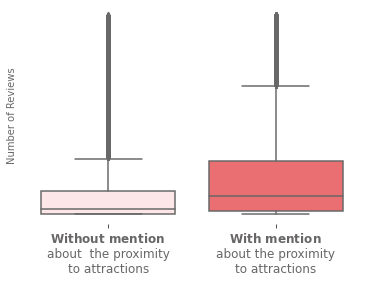

In [ ]:
fig, ax = plt.subplots()

# set the color palette
colors = [support_color,base_color]

sns.boxplot( x=listings_near_attractions_wo_outliers["listing_has_neighbourhood_overview"], 
            y=listings_near_attractions_wo_outliers["number_of_reviews"],
            palette=colors
            )

# set plot title and axis labels
plt.title('', color = text_color, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Number of Reviews', color = text_color)

# set x ticks label
xticklabels = ['Without mention \nabout  the proximity\nto attractions', 'With mention \nabout the proximity\nto attractions']
ax.set_xticklabels(xticklabels)

# Change the color of the x tick labels
plt.xticks(color=text_color)

# set the font properties for the original labels
font_prop = font_manager.FontProperties(weight='normal', size=12)

# create new labels with bold font weight for the substrings
new_labels = []
for label in xticklabels:
    if 'Without mention' in label:
        new_label = label.replace('Without mention', r'$\bf{Without\ mention}$')
    elif 'With mention' in label:
        new_label = label.replace('With mention', r'$\bf{With\ mention}$')
    else:
        new_label = label
    new_labels.append(new_label)

# set the new labels with bold font weight as the xticklabels
ax.set_xticklabels(new_labels, fontproperties=font_prop)

# Remove the y ticks and y tick labels
plt.yticks([])

# Remove border
sns.despine(bottom=True, left=True)

# show the plot
plt.show()

**It's important to take care of the description of the listings and the hosts**

When comparing how Superhosts describe their listings and themselves on the Airbnb website, comparing the non Superhosts, we found out that the lenght of the description is generally longer for Superhosts. 

Propestive can also learn that feature from Superhosts who are proven to be more efficient than the rest of the hosts

In [ ]:
agg_dict = {
            'description_len' : 'median',
            'host_about_len' : 'median',
            }

listings.groupby('host_is_superhost').agg(agg_dict).transpose()

host_is_superhost,False,True
description_len,110.0,151.0
host_about_len,2.0,22.0


In [ ]:
description_df = listings.groupby('host_is_superhost').description_len.median().reset_index()
description_df

,host_is_superhost,description_len
0,False,110.0
1,True,151.0


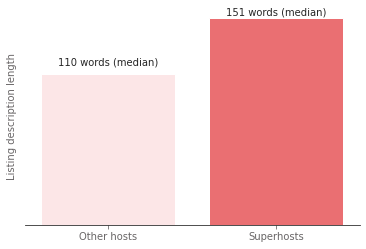

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()

# set the color palette
colors = [support_color,base_color]

sns.barplot(x='host_is_superhost', y='description_len', data=description_df, palette=colors)

# set plot title and axis labels
# plt.title('Get more reviews by mentioning the proximity to attractions in your listing!', color = text_color, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Listing description length',color = text_color)

# Remove border
sns.despine(left=True)

# Change the color of the tick labels
ax.tick_params(axis='both', colors=text_color)

# set x ticks label
xticklabels = ['Other hosts', 'Superhosts']
ax.set_xticklabels(xticklabels)


# remove y ticks
plt.yticks([])

# Add text
plt.text(0.25, 0.75, '110 words (median)', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.75, 0.98, '151 words (median)', ha='center', va='center', transform=plt.gca().transAxes)

# show the plot
plt.show()

In [ ]:
hosts_description_df = listings.groupby('host_is_superhost').host_about_len.median().reset_index()
hosts_description_df

,host_is_superhost,host_about_len
0,False,2.0
1,True,22.0


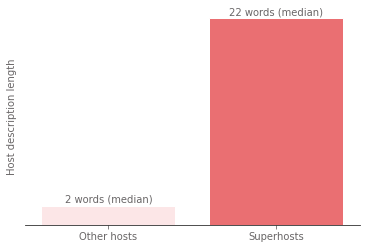

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()

# set the color palette
colors = [support_color,base_color]

sns.barplot(x='host_is_superhost', y='host_about_len', data=hosts_description_df, palette=colors)

# set plot title and axis labels
# plt.title('Get more reviews by mentioning the proximity to attractions in your listing!', color = text_color, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Host description length',color = text_color)

# Remove border
sns.despine(left=True)

# Change the color of the tick labels
ax.tick_params(axis='both', colors=text_color)

# set x ticks label
xticklabels = ['Other hosts', 'Superhosts']
ax.set_xticklabels(xticklabels)


# remove y ticks
plt.yticks([])

# Add text
plt.text(0.25, 0.12, '2 words (median)', ha='center', va='center', color=text_color, transform=plt.gca().transAxes)
plt.text(0.75, 0.98, '22 words (median)', ha='center', va='center', color=text_color, transform=plt.gca().transAxes)

# show the plot
plt.show()

# Pricing

**Median Price per Room type**

In [ ]:
price_overview = listings.groupby(['room_type','inner_outer']).agg({'price' : 'median'})
price_overview = price_overview.reset_index().pivot(index='room_type', columns='inner_outer', values='price')
price_overview

inner_outer,Inner London,Outer London
room_type,,
Entire home/apt,152.0,125.0
Hotel room,241.0,111.0
Private room,55.0,49.0
Shared room,38.0,40.0


Create a double bar chart to plot the median price per room type for Inner and Outer London

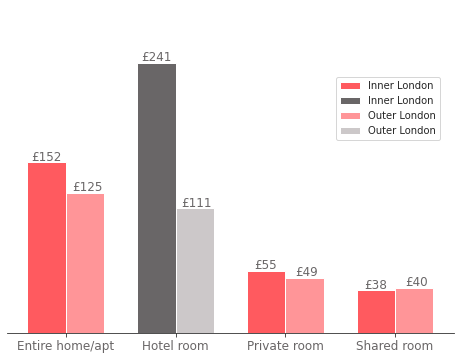

In [ ]:
# Define colors for the bars
colors = [base_color, support_color1]
hotel_colors = [dark_grey,light_grey]


# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width and position to avoid overlap
bar_width = 0.35
x_pos = np.arange(len(price_overview.index))

# separate hotel roon from the other types
x_pos_hotel = x_pos[1]
x_pos_others = list(x_pos.copy())
x_pos_others.remove(x_pos_hotel)
x_pos_others = np.array(x_pos_others)

# Plot the bars
for i, col in enumerate(price_overview.columns):
    ax.bar(x_pos_others + (i * bar_width), price_overview.iloc[x_pos_others,:][col], width=bar_width, color=colors[i], label=col)
    ax.bar(x_pos_hotel + (i * bar_width), price_overview.iloc[x_pos_hotel,:][col], width=bar_width, color=hotel_colors[i], label=col)


# add title
# ax.set_title('Significant Price difference for Hotel Room \nbetween Inner and Outer London', 
#              color=text_color,
#              fontsize = 12, 
#              fontweight='bold')

# Set x-axis labels and tick marks
ax.set_xticks(x_pos + (bar_width / 2), color=text_color)
ax.set_xticklabels(price_overview.index, fontsize=12, color=text_color)

# Set y-axis label and limits
ax.set_ylabel('')
ax.set_ylim([0, max(price_overview.max()) + 50])

# Remove y ticks and y ticks labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add legend and show plot
ax.legend(title='Inner/Outer London', fontsize=10, title_fontsize=10)
ax.legend(loc='upper right', bbox_to_anchor=(0.98,0.8))

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text 
for i, room_type in enumerate(price_overview.index):
    for j, inner_outer in enumerate(price_overview.columns):
        price = price_overview.iloc[i, j]
        # Add text at a specific position
        ax.text(i+j/2.7 , price +2 , '£{}'.format(int(price)), fontsize=12, color=text_color, ha="center")

plt.show()


* The price is in general higher in Inner London than Outer London, whatever the room type is
* Private room in Outer London is only 10% cheaper than Inner London, while the investment costs in Outer London is much less than Inner London. This insight's worth taking a closer look to explore potential investment opportunity in Private room Outer London
* Hotel room in Inner London costs twice as much as Outer London

**Are Hotel Room in Inner London that profitable?**

The large difference in price between Hotel room in Inner and Outer London is misleading.

Hotel room in Inner London is not as profitable as the previous chart suggests, as there is no Hotel room with more than 3 accommodates in Airbnb Outer London.

Therefore the median price is much higher in Inner London than Outer London, as it includes luxurious Hotel Room for a large group of guests. Those kinds of listings require much higher investiment costs

In [ ]:
hotel_room = listings[listings.room_type == 'Hotel room'].groupby(['accommodates','inner_outer']).price.median()
hotel_room = hotel_room.reset_index().pivot(index='accommodates', columns='inner_outer', values='price')
hotel_room

inner_outer,Inner London,Outer London
accommodates,,
1,64.0,93.0
2,159.0,99.0
3,175.0,123.0
4,263.0,NaN
5,301.0,NaN
6,592.5,NaN
8,868.5,NaN
10,320.0,NaN
12,65.0,NaN


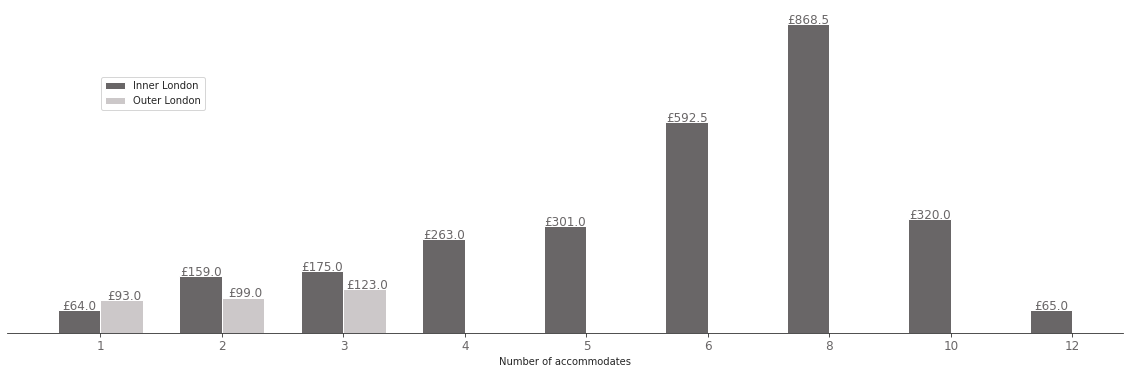

In [ ]:
# Define colors for the bars
colors = [dark_grey, light_grey]

# Create subplots
fig, ax = plt.subplots(figsize=(20, 6))

# Define bar width and position to avoid overlap
bar_width = 0.35
x_pos = np.arange(len(hotel_room.index))

# Plot the bars
for i, col in enumerate(hotel_room.columns):
    ax.bar(x_pos + (i * bar_width), hotel_room[col], width=bar_width, color=colors[i], label=col)

# add title
# ax.set_title('Re-evaluating the Disparity in Hotel Room Prices between Inner and Outer London on Airbnb\n Hotel Room in Inner London is NOT as profitable as the median price suggested', 
#              color=text_color, fontweight='bold')

# Set x-axis labels and tick marks
ax.set_xlabel('Number of accommodates')
ax.set_xticks(x_pos + (bar_width / 2), color=text_color)
ax.set_xticklabels(hotel_room.index, fontsize=12, color=text_color)

# Set y-axis label and limits
ax.set_ylabel('')
ax.set_ylim([0, max(hotel_room.max()) + 50])

# Remove y ticks and y ticks labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add legend and show plot
ax.legend(title='Inner/Outer London', fontsize=10, title_fontsize=10)
ax.legend(loc='upper left', bbox_to_anchor=(0.08,0.8))

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


for i, room_type in enumerate(hotel_room.index):
    for j, inner_outer in enumerate(hotel_room.columns):
        price = hotel_room.iloc[i, j]
        # Add text at a specific position
        ax.text(i+j/2.7 , price +2 , '£{}'.format(price), fontsize=12, color=text_color, ha="center")

plt.show()


* The significant difference is misleading, as there are no Hotel rooms available for more than 3 guests in Outer London 
* This skews the median price in Inner London, which includes luxurious Hotel room listings for larger groups that require a higher investment cost


# How Superhosts price differently from others

In [ ]:
listings_numeric_superhost = listings_numeric.merge(listings[['id','host_is_superhost']], how = 'inner', on = 'id')
abnb_corr_superhost = listings_numeric_superhost[listings_numeric_superhost.host_is_superhost == True].corr()

Strong correlation between Price and Number of accommodates for Superhosts category

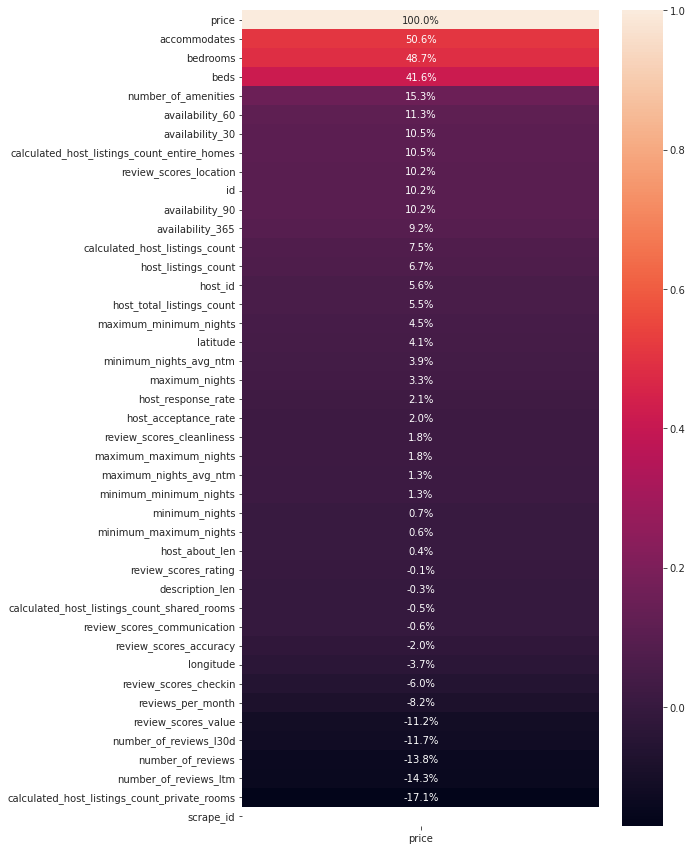

In [ ]:
target = 'price'

plt.figure(figsize=(8,15))
sns.heatmap(abnb_corr_superhost[[target]].sort_values(by=[target],ascending=False),
            annot=True,
            fmt=".1%");

In [ ]:
abnb_corr_nonsuperhost = listings_numeric_superhost[listings_numeric_superhost.host_is_superhost == False].corr()

Much weaker correlation between Price and Number of accommodates for non-Superhosts category

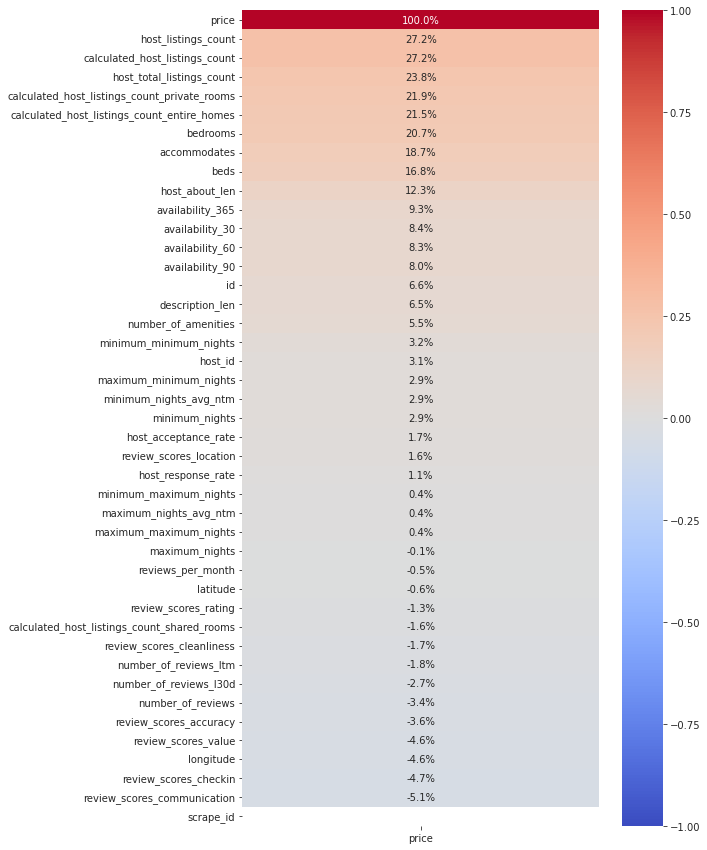

In [ ]:
target = 'price'
plt.figure(figsize=(8,15))
sns.heatmap(abnb_corr_nonsuperhost[[target]].sort_values(by=[target],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            fmt=".1%");

**Scatterplot of Price and Number of Accommodates for Superhosts and non-Superhosts status**

In [ ]:
plot_superhost = listings_numeric_superhost[listings_numeric_superhost.host_is_superhost == True][['price','accommodates']].groupby('accommodates')['price'].median().reset_index()
plot_nonsuperhost = listings_numeric_superhost[listings_numeric_superhost.host_is_superhost == False][['price','accommodates']].groupby('accommodates')['price'].median().reset_index()

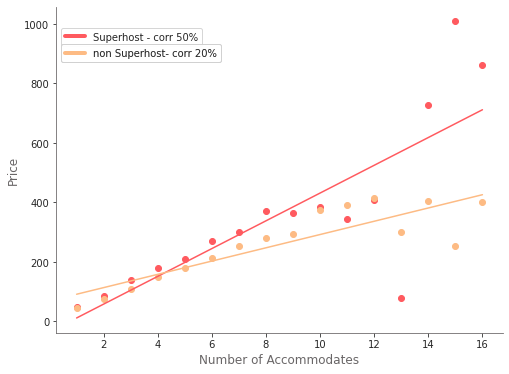

In [ ]:
plt.figure(figsize = (8,6))

# Assign superhost data to x1 and y1
x1 = plot_superhost.accommodates
y1 = plot_superhost.price

# Fit a polynomial regression line to the first dataset
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)

# Assign superhost data to x2 and y2
x2 = plot_nonsuperhost.accommodates
y2 = plot_nonsuperhost.price

# Fit a polynomial regression line to the second dataset
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)

# Plot the first scatter plot and trend line
plt.scatter(x1, y1, color=base_color)
plt.plot(x1, p1(x1), color=base_color)

# Plot the second scatter plot and trend line
plt.scatter(x2, y2, color=support_color2)
plt.plot(x2, p2(x2), color=support_color2)

# Add labels and title
plt.xlabel('Number of Accommodates',fontsize = 12, color = text_color)
plt.ylabel('Price',fontsize = 12, color = text_color)
# plt.title('Small listings compete on price, but larger groups bring efficiency and higher profits for Superhosts',fontsize = 14, color = text_color, fontweight = 'bold')

# Create two separate legends
legend1 = plt.legend(handles=[plt.Line2D([0], [0], color=base_color, lw=4, label='Superhost - corr 50%')], loc='upper left', bbox_to_anchor=(0, 0.95))
legend2 = plt.legend(handles=[plt.Line2D([0], [0], color=support_color2, lw=4, label='non Superhost- corr 20%')], loc='upper left', bbox_to_anchor=(0, 0.9))


# Add both legends to the plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

# Change the color of the tick labels
ax.tick_params(axis='both', colors=text_color)

# Remove the border of the plot
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

# Show the plot
plt.show()

* No significant difference in pricing between Superhosts and other hosts for small listings accommodating 1-3 people
* Stronger correlation between Price and the Number of accommodates for large listings accommodating 3 people or more for Superhosts



The potential explanations are:

* Small listings, constituting the majority, are highly competitive and thus compete mainly on price rather than other features

* Large listings cater to specific clients such as business or luxury travelers, competing on high-end amenities and unique architecture, which ↪ allows Superhosts to command higher prices due to exceptional efficiency


In [ ]:
accommodates_s = listings[listings.accommodates != 0].accommodates.value_counts().sort_index()
accommodates_s = pd.Series(accommodates_s[:8].values.tolist() + [accommodates_s[8:].sum()], index=range(1,10))

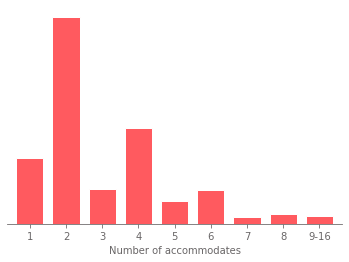

In [ ]:
# Create a bar plot from the new series
ax = accommodates_s.plot.bar(color = base_color,width=0.75)

# Set the labels and title of the plot
ax.set_xlabel("Number of accommodates", color = text_color)
ax.set_ylabel('')
# ax.set_title("Accommodation Capacity Distribution", color = text_color, fontweight = 'bold')

# Remove the y ticks and y tick labels
ax.set_yticks([])
ax.set_yticklabels([])

# Set the x ticks and rotate the x tick labels to a vertical orientation
ax.set_xticks(range(len(accommodates_s.index)))
xticklabels = list(accommodates_s.index)
xticklabels[-1] = '9-16'
ax.set_xticklabels(xticklabels, rotation=0,color=text_color)

# Remove the y label and left, right, and top border of the plot
ax.spines[['left','right','top']].set_visible(False)

# Change the color of the x axis and x ticks
ax.spines['bottom'].set_color(text_color)
ax.tick_params(axis='x', colors=text_color)

# Display the plot
plt.show()
